___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1 style="text-align: center;">Deep Learning<br><br>Assignment-2 (CNN)<br><br>Image Classification with CNN<br><h1>

# Task and Dataset Info

Welcome to second assignment of Deep learning lesson. Follow the instructions and complete the assignment.

**Build an image classifier with Convolutional Neural Networks for the Fashion MNIST dataset. This data set includes 10 labels of different clothing types with 28 by 28 *grayscale* images. There is a training set of 60,000 images and 10,000 test images.**

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
#data
import numpy as np
import pandas as pd
#tensorflow/keras
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
#sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
#optimization
from tensorflow.keras.optimizers import Adam, Adadelta, RMSprop, Nadam
import optuna
#model saving
import pickle
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


# Recognizing and Understanding Data

**TASK 1: Run the code below to download the dataset using Keras.**

In [3]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

- we have a balanced dataset

[Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000'),
 Text(0, 0, '6000')]

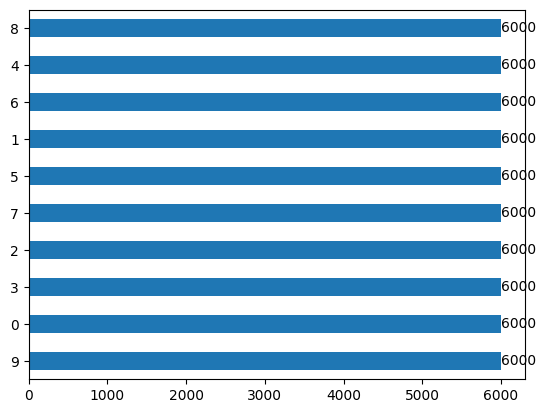

In [5]:
ax = pd.Series(y_train).value_counts().plot(kind='barh')
ax.bar_label(ax.containers[0])

**TASK 2: Use matplotlib to view an image from the data set. It can be any image from the data set.**

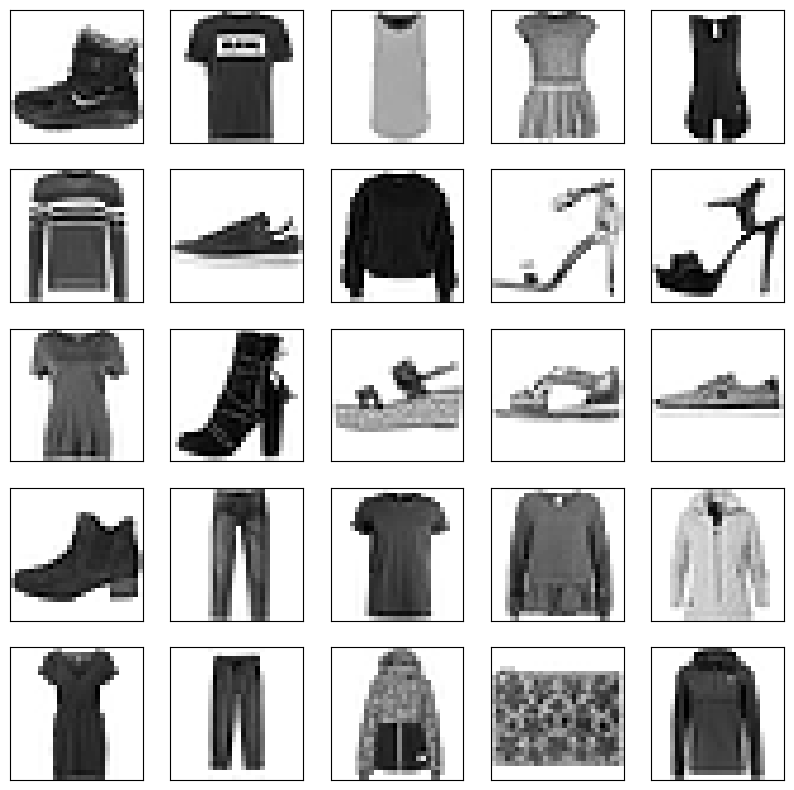

In [6]:
figure = plt.figure(figsize=(10,10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)

  plt.imshow(x_train[i], cmap=plt.cm.binary)

# Data Preprocessing

**TASK 3: Normalize the X train and X test data by dividing by the max value of the image arrays.**

In [7]:
x_train.max(),x_test.max()

(255, 255)

In [8]:
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")
x_train /= 255
x_test /= 255

In [9]:
x_train.max(),x_test.max()

(1.0, 1.0)

**Task 4: Reshape the X arrays to include a 4 dimension of the single channel. Similar to what we did for the numbers MNIST data set.**

In [10]:
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [11]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [12]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

**TASK 5: Convert the y_train and y_test values to be one-hot encoded for categorical analysis by Keras.**

In [13]:
y_train[:5], y_test[:5]

(array([9, 0, 0, 3, 0], dtype=uint8), array([9, 2, 1, 1, 6], dtype=uint8))

In [14]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
y_train[:5], y_test[:5]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

# Modeling

## Create the model

**TASK 5: Use Keras to create a model consisting of at least the following layers (but feel free to experiment):**

* 2D Convolutional Layer, filters=28 and kernel_size=(3,3)
* Pooling Layer where pool_size = (2,2) strides=(1,1)

* Flatten Layer
* Dense Layer (128 Neurons, but feel free to play around with this value), RELU activation

* Final Dense Layer of 10 Neurons with a softmax activation

**Then compile the model with these parameters: loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy']**

In [16]:
model = Sequential()

model.add(Conv2D(filters=28, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2), strides = (1, 1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 28)        280       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 27, 27, 28)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 20412)             0         
                                                                 
 dense (Dense)               (None, 128)               2612864   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2,614,434
Trainable params: 2,614,434
Non-trainable params: 0
______________________________________________

##  Model Training 

**TASK 6: Train/Fit the model to the x_train set by using EarlyStop. Amount of epochs is up to you.**

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="loss", mode="min", verbose=1, patience=15,
                                           restore_best_weights=True)

In [19]:
model_history = model.fit(x_train, y_train, batch_size=32, epochs=100, callbacks=[early_stop])

Epoch 1/100
1875/1875 [==============================] - 11s 4ms/step - loss: 0.3750 - accuracy: 0.8698
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2464 - accuracy: 0.9122
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2095 - accuracy: 0.9256
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1868 - accuracy: 0.9341
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1682 - accuracy: 0.9411
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1515 - accuracy: 0.9474
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1383 - accuracy: 0.9520
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1295 - accuracy: 0.9557
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1201 - accuracy: 0.9591
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - 

1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - accuracy: 0.9970
Epoch 80/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0126 - accuracy: 0.9969
Epoch 81/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0119 - accuracy: 0.9972
Epoch 82/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0133 - accuracy: 0.9971
Epoch 83/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0102 - accuracy: 0.9978
Epoch 84/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0100 - accuracy: 0.9973
Epoch 85/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0106 - accuracy: 0.9975
Epoch 86/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0083 - accuracy: 0.9982
Epoch 87/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0122 - accuracy: 0.9975
Epoch 88/100
1875/1875 [==============================] - 7s 4ms/step - loss:

**TASK 7: Plot values of metrics you used in your model.**

- the model achive high accuracy with low loss

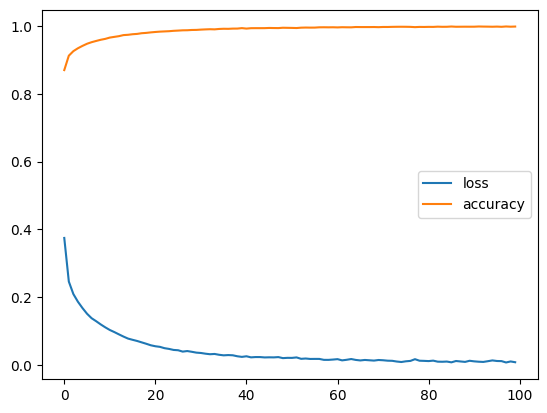

In [20]:
pd.DataFrame(model_history.history).plot();

- the model achive 90% accuracy 

In [21]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 2.6293067932128906
Test accuracy: 0.9006999731063843


## Model Evaluation

**TASK 8: Show the accuracy,precision,recall,f1-score the model achieved on the x_test data set. Keep in mind, there are quite a few ways to do this, but we recommend following the same procedure we showed in the MNIST lecture.**

- as we casn see most of the class are predicted very well unless class 6 

In [22]:
pred = model.predict(x_test)
y_pred =to_categorical(np.argmax(pred, axis=1)) 
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.91      0.88      0.89      1000
           4       0.78      0.91      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.78      0.68      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.97      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



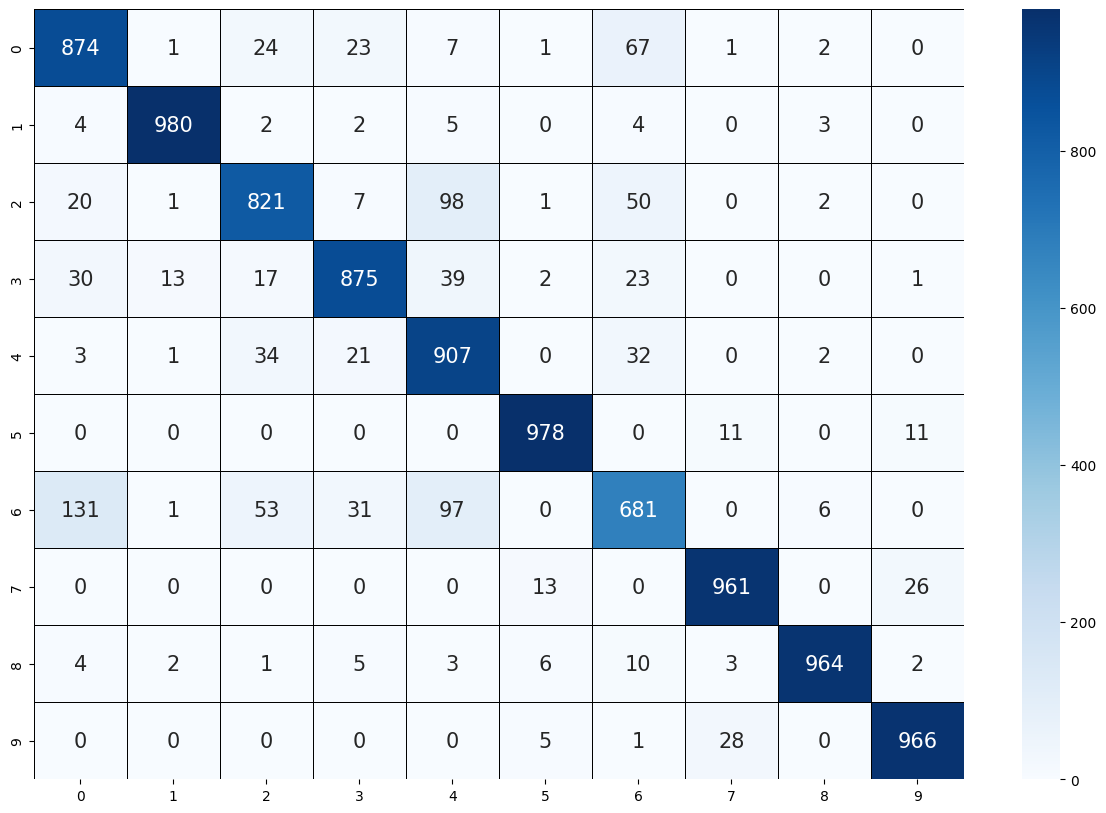

In [23]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
)
plt.show()

- we have more correct prediction rather than incorrect 

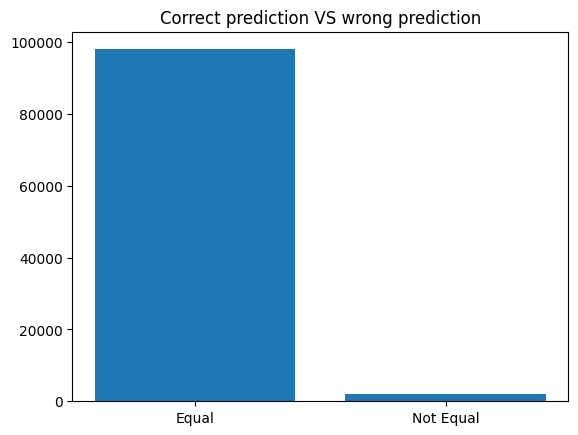

In [24]:
plt.bar(["Equal","Not Equal"],[np.equal(y_test, y_pred).sum(),np.not_equal(y_test, y_pred).sum()])
plt.title("Correct prediction VS wrong prediction")
plt.show();

## Prediction

In [25]:
classes=["T-shirt/top", "Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

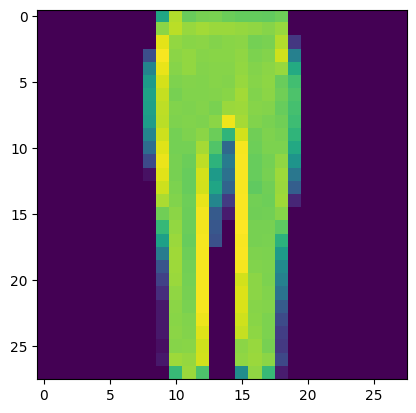

In [26]:
plt.imshow(x_test[76])
plt.show()

In [27]:
classes[np.argmax(y_test[76])]

'Trouser'

In [28]:
x_test[76].shape

(28, 28, 1)

In [29]:
predicted = model.predict(np.expand_dims(x_test[76], 0))
predicted

1/1 [==============================] - 0s 81ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [30]:
classes[np.argmax(predicted)]

'Trouser'

# Now i will try to create another architecture 

##### Apply Data augmentation

In [32]:
image_gen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.10,
    height_shift_range=0.10,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode="nearest",
)

- before Data augmentation

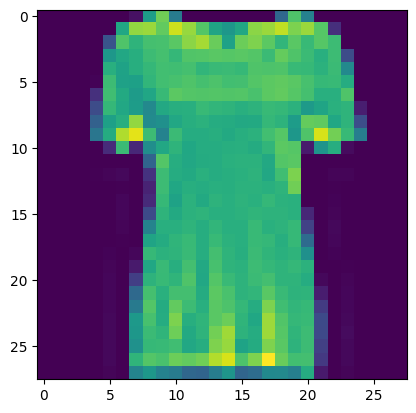

In [33]:
plt.imshow(x_train[10]);

- After Data augmentation

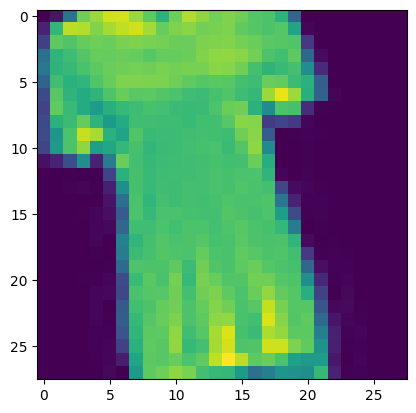

In [34]:
plt.imshow(image_gen.random_transform(x_train[10]));

In [45]:
y_train.shape

(60000, 10)

In [55]:
x_train.shape

(60000, 28, 28, 1)

In [60]:
train_generator = image_gen.flow(
    x_train, 
    y_train, 
    batch_size=32
)

In [76]:
test_generator = image_gen.flow(
    x_test, 
    y_test, 
    batch_size=32
)

In [72]:
batch_images, batch_labels = train_generator[1]

In [73]:
batch_images.shape

(32, 28, 28, 1)

In [74]:
batch_labels.shape

(32, 10)

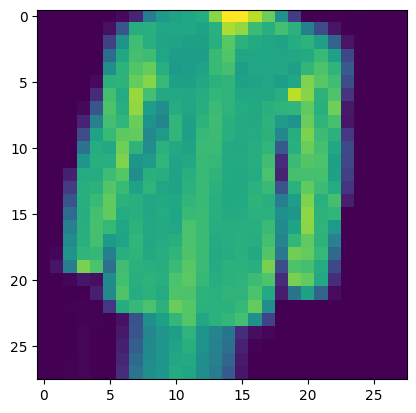

In [87]:
image = batch_images[10]
plt.imshow(image)
plt.show()

In [77]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(3, 3), strides = (1, 1)))
model.add(Conv2D(filters=48, kernel_size=(3, 3),  activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(3, 3), strides = (1, 1)))
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [78]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 48)        13872     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 24, 48)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 27648)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [83]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", mode="min", verbose=1, patience=5,
                                           restore_best_weights=True)

In [84]:
my_model_history = model.fit(train_generator,epochs=50,steps_per_epoch=len(train_generator),
    validation_data=test_generator, validation_steps=len(test_generator),callbacks=[early_stop])

Epoch 1/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3421 - accuracy: 0.8714 - val_loss: 0.3504 - val_accuracy: 0.8668
Epoch 2/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3279 - accuracy: 0.8771 - val_loss: 0.3391 - val_accuracy: 0.8765
Epoch 3/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3184 - accuracy: 0.8799 - val_loss: 0.3619 - val_accuracy: 0.8680
Epoch 4/50
1875/1875 [==============================] - 12s 7ms/step - loss: 0.3104 - accuracy: 0.8842 - val_loss: 0.3271 - val_accuracy: 0.8799
Epoch 5/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.3059 - accuracy: 0.8867 - val_loss: 0.3277 - val_accuracy: 0.8828
Epoch 6/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2959 - accuracy: 0.8907 - val_loss: 0.3185 - val_accuracy: 0.8819
Epoch 7/50
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2960 - accuracy: 0.8911 - val_loss: 0.3181 - val_ac

<Axes: >

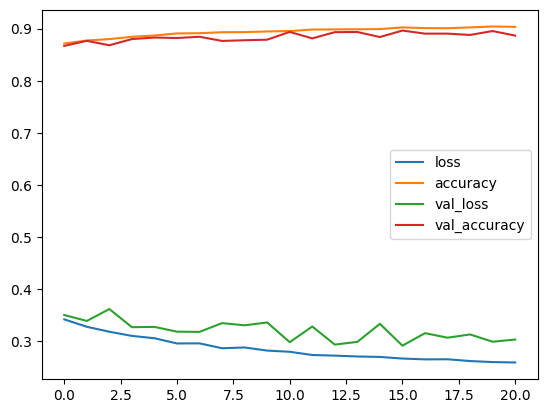

In [85]:
loss_df = pd.DataFrame(my_model_history.history) 
loss_df.plot()

In [86]:
score = model.evaluate(test_generator)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 2s 6ms/step - loss: 0.3001 - accuracy: 0.8942
Test loss: 0.3001137673854828
Test accuracy: 0.8942000269889832


In [89]:
pred = model.predict(test_generator) > 0.5
print(classification_report(y_test, y_pred))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.82      0.87      0.85      1000
           1       0.98      0.98      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.91      0.88      0.89      1000
           4       0.78      0.91      0.84      1000
           5       0.97      0.98      0.98      1000
           6       0.78      0.68      0.73      1000
           7       0.96      0.96      0.96      1000
           8       0.98      0.96      0.97      1000
           9       0.96      0.97      0.96      1000

   micro avg       0.90      0.90      0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000
 samples avg       0.90      0.90      0.90     10000



#### Im getting a good result but not as good as the previous architecture 

References:
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-fashion-mnist-clothing-classification/

# End of Assignment

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___